In [1]:
# IMPORT
import os
import datetime
import math
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
    
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

In [2]:
# DATA
df1 = pd.read_csv('data_day.csv')
df2 = pd.read_csv('data_2018-08-05_2021-04-30.csv')
df3 = pd.read_csv('data_2018-05-05_2018-08-04.csv')
df4 = pd.read_csv('data_2015-08-09_2018-05-04.csv')
df5 = pd.read_csv('data_2013-02-12_2015-08-08.csv')
df6 = pd.read_csv('data_2010-05-19_to_2013-02-11.csv')
df7 = pd.read_csv('data_2007-08-23_to_2010-05-18.csv')
df8 = pd.read_csv('data_2004-11-26_to_2007-08-22.csv')
df = pd.concat([df6, df5, df4, df3, df2, df1])
df.index = range(0,4996)
df.tail()

date_time = pd.concat([pd.to_datetime(df['datetime'][0:4000]),pd.to_datetime(df['datetime'][4000:])])

df.set_index(date_time, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4996 entries, 2010-05-19 to 2024-01-21
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4996 non-null   object 
 1   datetime          4996 non-null   object 
 2   tempmax           4996 non-null   float64
 3   tempmin           4996 non-null   float64
 4   temp              4996 non-null   float64
 5   feelslikemax      4996 non-null   float64
 6   feelslikemin      4996 non-null   float64
 7   feelslike         4996 non-null   float64
 8   dew               4996 non-null   float64
 9   humidity          4996 non-null   float64
 10  precip            4996 non-null   float64
 11  precipprob        4996 non-null   int64  
 12  precipcover       4996 non-null   float64
 13  preciptype        3314 non-null   object 
 14  snow              742 non-null    float64
 15  snowdepth         742 non-null    float64
 16  windgust          916 no

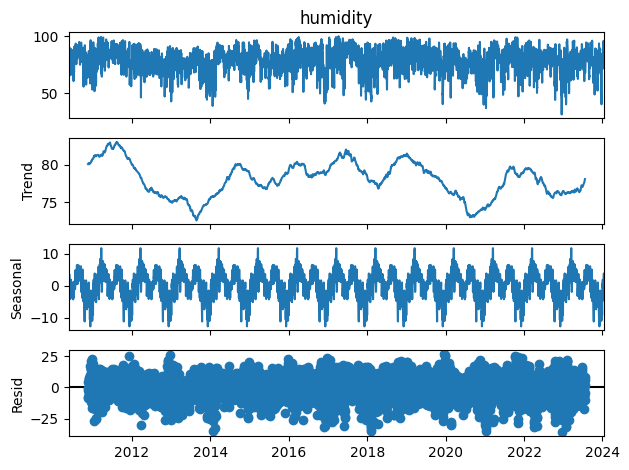

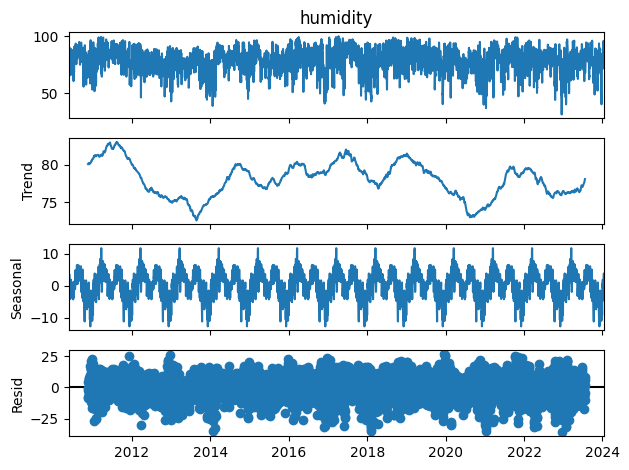

In [3]:
decomposition = seasonal_decompose(df.humidity, period=365)
decomposition.plot()

In [5]:
data = df.temp
print(adfuller(data))

(-4.17308180121664, 0.0007315471984108423, 19, 4976, {'1%': -3.4316648465836668, '5%': -2.8621210193933546, '10%': -2.5670792774336104}, 18393.29753082528)


In [12]:
stepwise_fit = auto_arima(data, trace = True, suppress_warnings= True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=18531.376, Time=3.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=30787.142, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=19083.377, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=25533.303, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=46406.336, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=18818.784, Time=0.93 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=18870.039, Time=1.71 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=18510.532, Time=4.47 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=18516.393, Time=4.06 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=18521.239, Time=5.57 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=18517.139, Time=5.22 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=18510.464, Time=3.70 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=18606.563, Time=1.75 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=18512.435, Time=4.96 sec
 ARIMA(1,0,4)(0,0,0

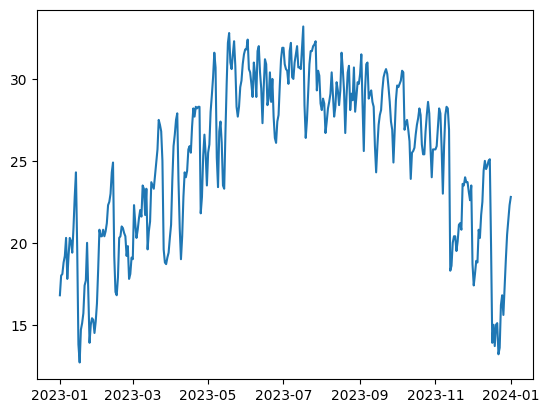

In [19]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]
plt.plot(data.loc['2023-01-01':'2024-01-01'], label='train')

In [24]:
model = ARIMA(train[-365:].values, order=(2, 0, 3))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -653.844
Date:                Fri, 29 Mar 2024   AIC                           1321.687
Time:                        00:35:16   BIC                           1348.987
Sample:                             0   HQIC                          1332.536
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.1194      3.419      7.348      0.000      18.419      31.820
ar.L1          1.2998      0.205      6.351      0.000       0.899       1.701
ar.L2         -0.3062      0.202     -1.516      0.1

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=14746.873, Time=3.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=24670.173, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=15185.067, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20458.898, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=37079.580, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=14976.927, Time=0.76 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=15008.806, Time=1.45 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=14724.909, Time=3.62 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=14727.008, Time=3.22 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=14730.957, Time=4.28 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=14727.476, Time=4.17 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=14724.716, Time=3.13 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=14801.861, Time=1.46 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=14726.689, Time=4.60 sec


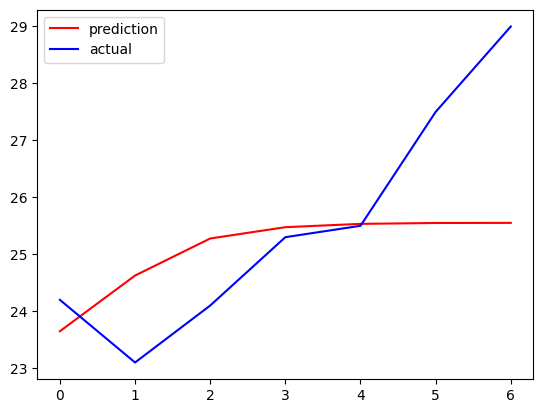

In [26]:
forecast = model_fit.predict(start=len(train[-365:]), end=len(train[-365:])+6)
plt.plot(forecast, 'r', label='prediction')
plt.plot(test[:7].values, 'b', label='actual')
plt.legend()